# Aadhar Enrollment Dataset Analysis
## Histogram & Correlation Heatmap Visualization

This notebook analyzes the Aadhar enrollment dataset using:
- **Histograms**: To visualize frequency distributions
- **Correlation Heatmap**: To show relationships between variables

---
## Import Required Libraries

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Display settings
%matplotlib inline
plt.style.use('default')

---
## Histogram Visualizations

### Creating 6 Different Histograms:
1. Age Group 0-5 Enrollments
2. Age Group 5-17 Enrollments
3. Age Group 18+ Enrollments
4. Total Enrollments
5. Overlapping Age Group Comparison
6. Histogram with Cumulative Distribution

DataFrame Shape: 99 rows × 7 columns

DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            99 non-null     object 
 1   State           98 non-null     object 
 2   district        94 non-null     object 
 3   pincode         85 non-null     float64
 4   age_0_5         94 non-null     float64
 5   age_5_17        94 non-null     float64
 6   age_18_greater  95 non-null     float64
dtypes: float64(4), object(3)
memory usage: 5.5+ KB

GENERATING HISTOGRAMS
✓ Saved: aadhar_enrollment_histograms.png


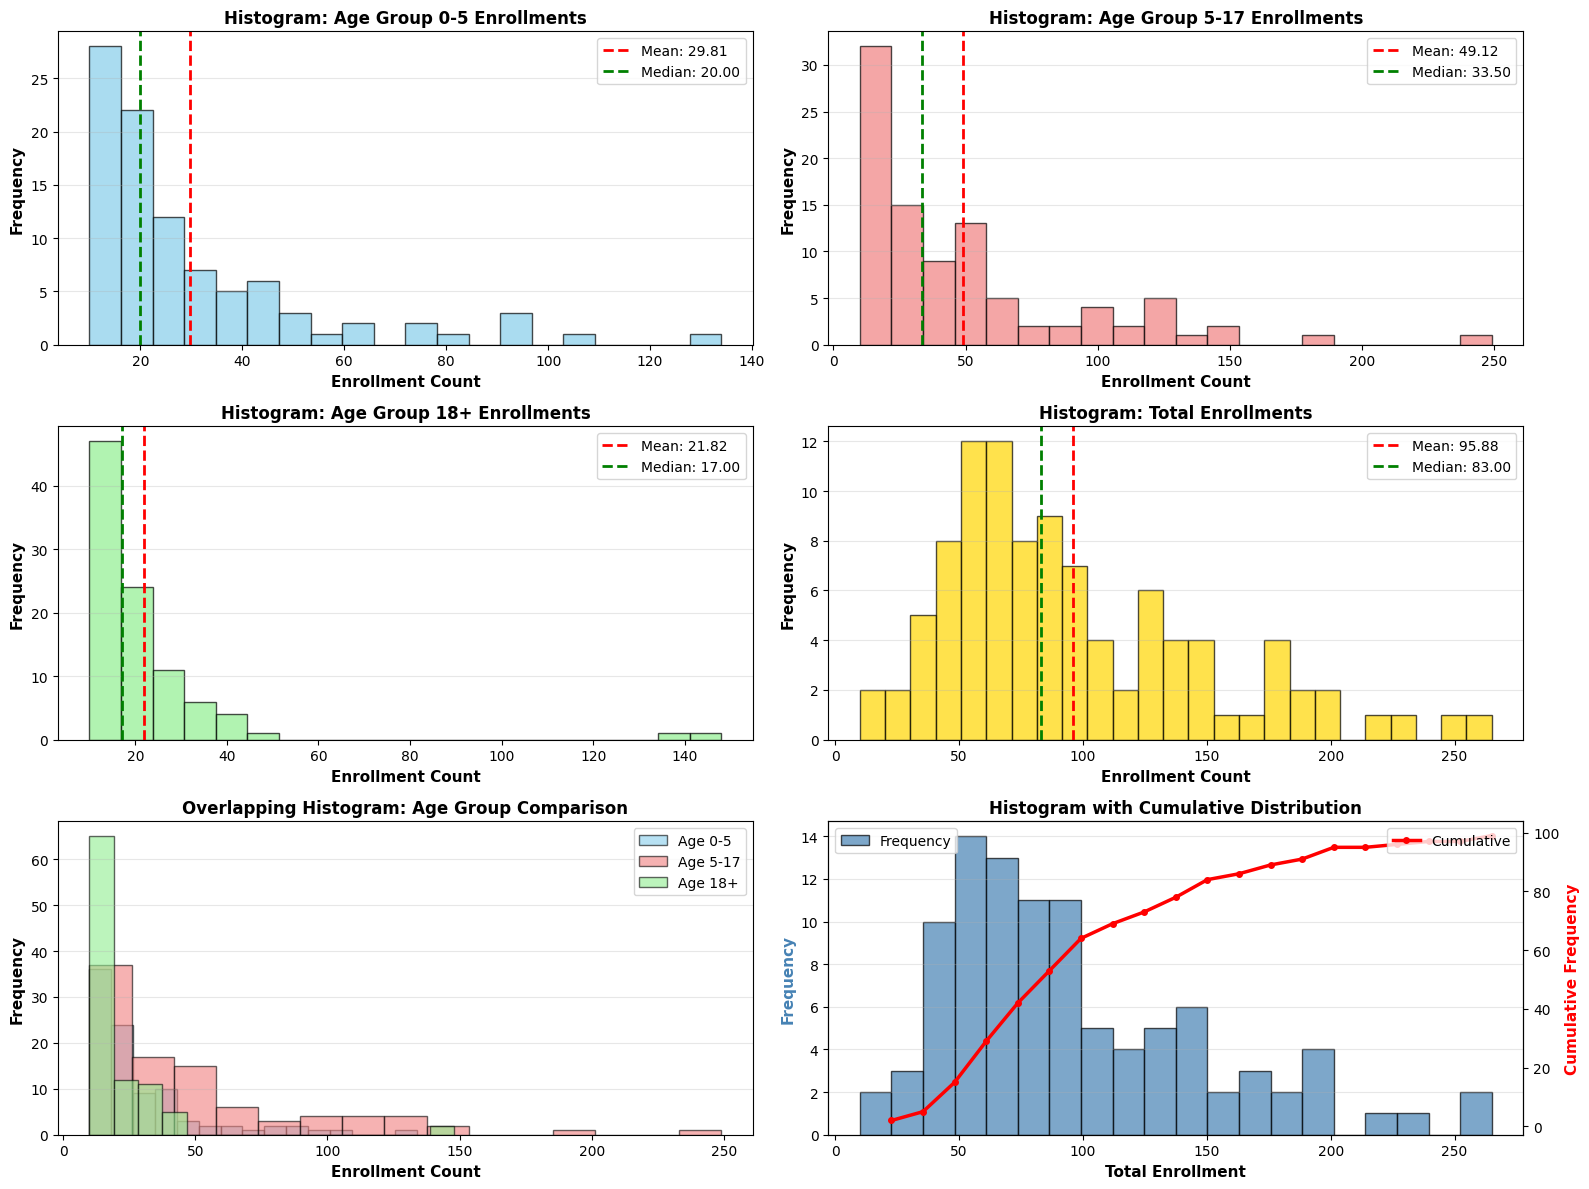

In [10]:
# Read Excel file
df = pd.read_excel(r'Sample_Aadhar_Enrollment_Dataset.xlsx')

print(f"DataFrame Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print("\n" + "="*70)
print("DATASET INFORMATION")
print("="*70)
df.info()

# Display first few rows
df.head()

# Calculate Total Enrollment
df['Total_Enrollment'] = df['age_0_5'].fillna(0) + df['age_5_17'].fillna(0) + df['age_18_greater'].fillna(0)

# Display statistical summary
df.describe()

print("\n" + "="*70)
print("GENERATING HISTOGRAMS")
print("="*70)

# Create figure with subplots for comprehensive histogram analysis
fig = plt.figure(figsize=(16, 12))

# 1. Histogram for Age 0-5 Enrollments
ax1 = plt.subplot(3, 2, 1)
ax1.hist(df['age_0_5'].dropna(), bins=20, color='skyblue', edgecolor='black', alpha=0.7)
ax1.set_xlabel('Enrollment Count', fontsize=11, fontweight='bold')
ax1.set_ylabel('Frequency', fontsize=11, fontweight='bold')
ax1.set_title('Histogram: Age Group 0-5 Enrollments', fontsize=12, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)
ax1.axvline(df['age_0_5'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["age_0_5"].mean():.2f}')
ax1.axvline(df['age_0_5'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["age_0_5"].median():.2f}')
ax1.legend()

# 2. Histogram for Age 5-17 Enrollments
ax2 = plt.subplot(3, 2, 2)
ax2.hist(df['age_5_17'].dropna(), bins=20, color='lightcoral', edgecolor='black', alpha=0.7)
ax2.set_xlabel('Enrollment Count', fontsize=11, fontweight='bold')
ax2.set_ylabel('Frequency', fontsize=11, fontweight='bold')
ax2.set_title('Histogram: Age Group 5-17 Enrollments', fontsize=12, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)
ax2.axvline(df['age_5_17'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["age_5_17"].mean():.2f}')
ax2.axvline(df['age_5_17'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["age_5_17"].median():.2f}')
ax2.legend()

# 3. Histogram for Age 18+ Enrollments
ax3 = plt.subplot(3, 2, 3)
ax3.hist(df['age_18_greater'].dropna(), bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
ax3.set_xlabel('Enrollment Count', fontsize=11, fontweight='bold')
ax3.set_ylabel('Frequency', fontsize=11, fontweight='bold')
ax3.set_title('Histogram: Age Group 18+ Enrollments', fontsize=12, fontweight='bold')
ax3.grid(axis='y', alpha=0.3)
ax3.axvline(df['age_18_greater'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["age_18_greater"].mean():.2f}')
ax3.axvline(df['age_18_greater'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["age_18_greater"].median():.2f}')
ax3.legend()

# 4. Histogram for Total Enrollment
ax4 = plt.subplot(3, 2, 4)
ax4.hist(df['Total_Enrollment'].dropna(), bins=25, color='gold', edgecolor='black', alpha=0.7)
ax4.set_xlabel('Enrollment Count', fontsize=11, fontweight='bold')
ax4.set_ylabel('Frequency', fontsize=11, fontweight='bold')
ax4.set_title('Histogram: Total Enrollments', fontsize=12, fontweight='bold')
ax4.grid(axis='y', alpha=0.3)
ax4.axvline(df['Total_Enrollment'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Total_Enrollment"].mean():.2f}')
ax4.axvline(df['Total_Enrollment'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["Total_Enrollment"].median():.2f}')
ax4.legend()

# 5. Overlapping Histogram for Age Group Comparison
ax5 = plt.subplot(3, 2, 5)
ax5.hist(df['age_0_5'].dropna(), bins=15, color='skyblue', alpha=0.6, label='Age 0-5', edgecolor='black')
ax5.hist(df['age_5_17'].dropna(), bins=15, color='lightcoral', alpha=0.6, label='Age 5-17', edgecolor='black')
ax5.hist(df['age_18_greater'].dropna(), bins=15, color='lightgreen', alpha=0.6, label='Age 18+', edgecolor='black')
ax5.set_xlabel('Enrollment Count', fontsize=11, fontweight='bold')
ax5.set_ylabel('Frequency', fontsize=11, fontweight='bold')
ax5.set_title('Overlapping Histogram: Age Group Comparison', fontsize=12, fontweight='bold')
ax5.legend()
ax5.grid(axis='y', alpha=0.3)

# 6. Histogram with Cumulative Distribution
ax6 = plt.subplot(3, 2, 6)
n, bins, patches = ax6.hist(df['Total_Enrollment'].dropna(), bins=20, color='steelblue', 
                             edgecolor='black', alpha=0.7, label='Frequency')
# Add cumulative line
counts, bin_edges = np.histogram(df['Total_Enrollment'].dropna(), bins=20)
cumulative = np.cumsum(counts)
ax6_twin = ax6.twinx()
ax6_twin.plot(bin_edges[1:], cumulative, color='red', linewidth=2.5, marker='o', 
              markersize=4, label='Cumulative')
ax6.set_xlabel('Total Enrollment', fontsize=11, fontweight='bold')
ax6.set_ylabel('Frequency', fontsize=11, fontweight='bold', color='steelblue')
ax6_twin.set_ylabel('Cumulative Frequency', fontsize=11, fontweight='bold', color='red')
ax6.set_title('Histogram with Cumulative Distribution', fontsize=12, fontweight='bold')
ax6.grid(axis='y', alpha=0.3)
ax6.legend(loc='upper left')
ax6_twin.legend(loc='upper right')

plt.tight_layout()
plt.savefig('aadhar_enrollment_histograms.png', dpi=300, bbox_inches='tight')
print("✓ Saved: aadhar_enrollment_histograms.png")
plt.show()

### Histogram Analysis Summary

In [11]:
print("\n" + "="*70)
print("HISTOGRAM ANALYSIS SUMMARY")
print("="*70)

print("\n Total Enrollments:")
print(f"   - Mean: {df['Total_Enrollment'].mean():.2f}")
print(f"   - Median: {df['Total_Enrollment'].median():.2f}")
print(f"   - Std Dev: {df['Total_Enrollment'].std():.2f}")
print(f"   - Range: {df['Total_Enrollment'].min():.0f} to {df['Total_Enrollment'].max():.0f}")

print("\n" + "="*70)
print("KEY INSIGHTS FROM HISTOGRAMS:")
print("="*70)
print("• The histograms show the frequency distribution of enrollments")
print("• Age 5-17 group shows the highest enrollment counts on average")
print("• Red dashed line indicates mean, green dashed line indicates median")
print("• Most distributions show right-skewed patterns (positive skew)")
print("• Cumulative histogram helps understand enrollment accumulation")
print("\n" + "="*70)
print("HISTOGRAM GENERATION COMPLETE!")
print("="*70)


HISTOGRAM ANALYSIS SUMMARY

 Total Enrollments:
   - Mean: 95.88
   - Median: 83.00
   - Std Dev: 53.48
   - Range: 10 to 265

KEY INSIGHTS FROM HISTOGRAMS:
• The histograms show the frequency distribution of enrollments
• Age 5-17 group shows the highest enrollment counts on average
• Red dashed line indicates mean, green dashed line indicates median
• Most distributions show right-skewed patterns (positive skew)
• Cumulative histogram helps understand enrollment accumulation

HISTOGRAM GENERATION COMPLETE!


---
## Correlation Heatmap Visualization

A heatmap shows the correlation between different numerical variables:
- **Red colors**: Positive correlation (variables increase together)
- **Blue colors**: Negative correlation (one increases, other decreases)
- **White colors**: Weak or no correlation


GENERATING CORRELATION HEATMAP
✓ Saved: correlation_heatmap.png


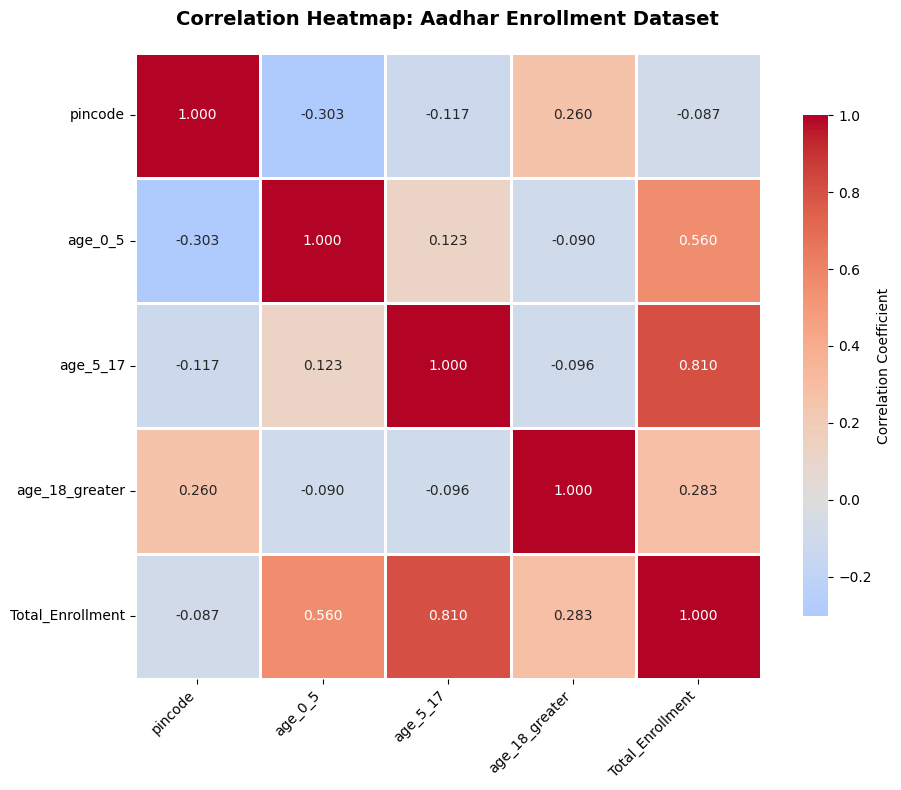

In [8]:
# Display first few rows
df.head()

print("\n" + "="*70)
print("GENERATING CORRELATION HEATMAP")
print("="*70)

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True,  # Show correlation values
            fmt='.3f',   # Format to 3 decimal places
            cmap='coolwarm',  # Color scheme (blue-white-red)
            center=0,    # Center the colormap at 0
            square=True,  # Make cells square-shaped
            linewidths=1,  # Add gridlines
            cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'})

plt.title('Correlation Heatmap: Aadhar Enrollment Dataset', 
          fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
print("✓ Saved: correlation_heatmap.png")
plt.show()

### Correlation Analysis Summary

In [9]:
print("\n" + "="*70)
print("CORRELATION ANALYSIS SUMMARY")
print("="*70)

print("\nCorrelation Matrix:")
print(correlation_matrix)

print("\n" + "="*70)
print("KEY INSIGHTS FROM CORRELATION HEATMAP:")
print("="*70)
print("• Positive correlation (red): Variables increase together")
print("• Negative correlation (blue): One increases as other decreases")
print("• Values range from -1 (perfect negative) to +1 (perfect positive)")
print("• Values near 0 indicate weak or no linear relationship")

# Find strongest correlations (excluding diagonal)
print("\nStrongest Correlations:")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.3:  # Only show correlations > 0.3
            print(f"  • {correlation_matrix.columns[i]} ↔ {correlation_matrix.columns[j]}: {corr_value:.3f}")

print("\n" + "="*70)
print("ALL VISUALIZATIONS COMPLETE!")
print("="*70)


CORRELATION ANALYSIS SUMMARY

Correlation Matrix:
                   pincode   age_0_5  age_5_17  age_18_greater  \
pincode           1.000000 -0.303422 -0.117133        0.260341   
age_0_5          -0.303422  1.000000  0.122735       -0.090233   
age_5_17         -0.117133  0.122735  1.000000       -0.096018   
age_18_greater    0.260341 -0.090233 -0.096018        1.000000   
Total_Enrollment -0.086933  0.559962  0.810231        0.282533   

                  Total_Enrollment  
pincode                  -0.086933  
age_0_5                   0.559962  
age_5_17                  0.810231  
age_18_greater            0.282533  
Total_Enrollment          1.000000  

KEY INSIGHTS FROM CORRELATION HEATMAP:
• Positive correlation (red): Variables increase together
• Negative correlation (blue): One increases as other decreases
• Values range from -1 (perfect negative) to +1 (perfect positive)
• Values near 0 indicate weak or no linear relationship

Strongest Correlations:
  • pincode ↔ age_0_

---
## Scatter Plot Visualizations

Scatter plots show the relationship between two variables:
- **Pattern**: Shows how variables relate (linear, non-linear, or no pattern)
- **Trend**: Helps identify positive, negative, or no correlation
- **Outliers**: Points that don't follow the general pattern


GENERATING SCATTER PLOTS
✓ Saved: aadhar_enrollment_scatter_plots.png


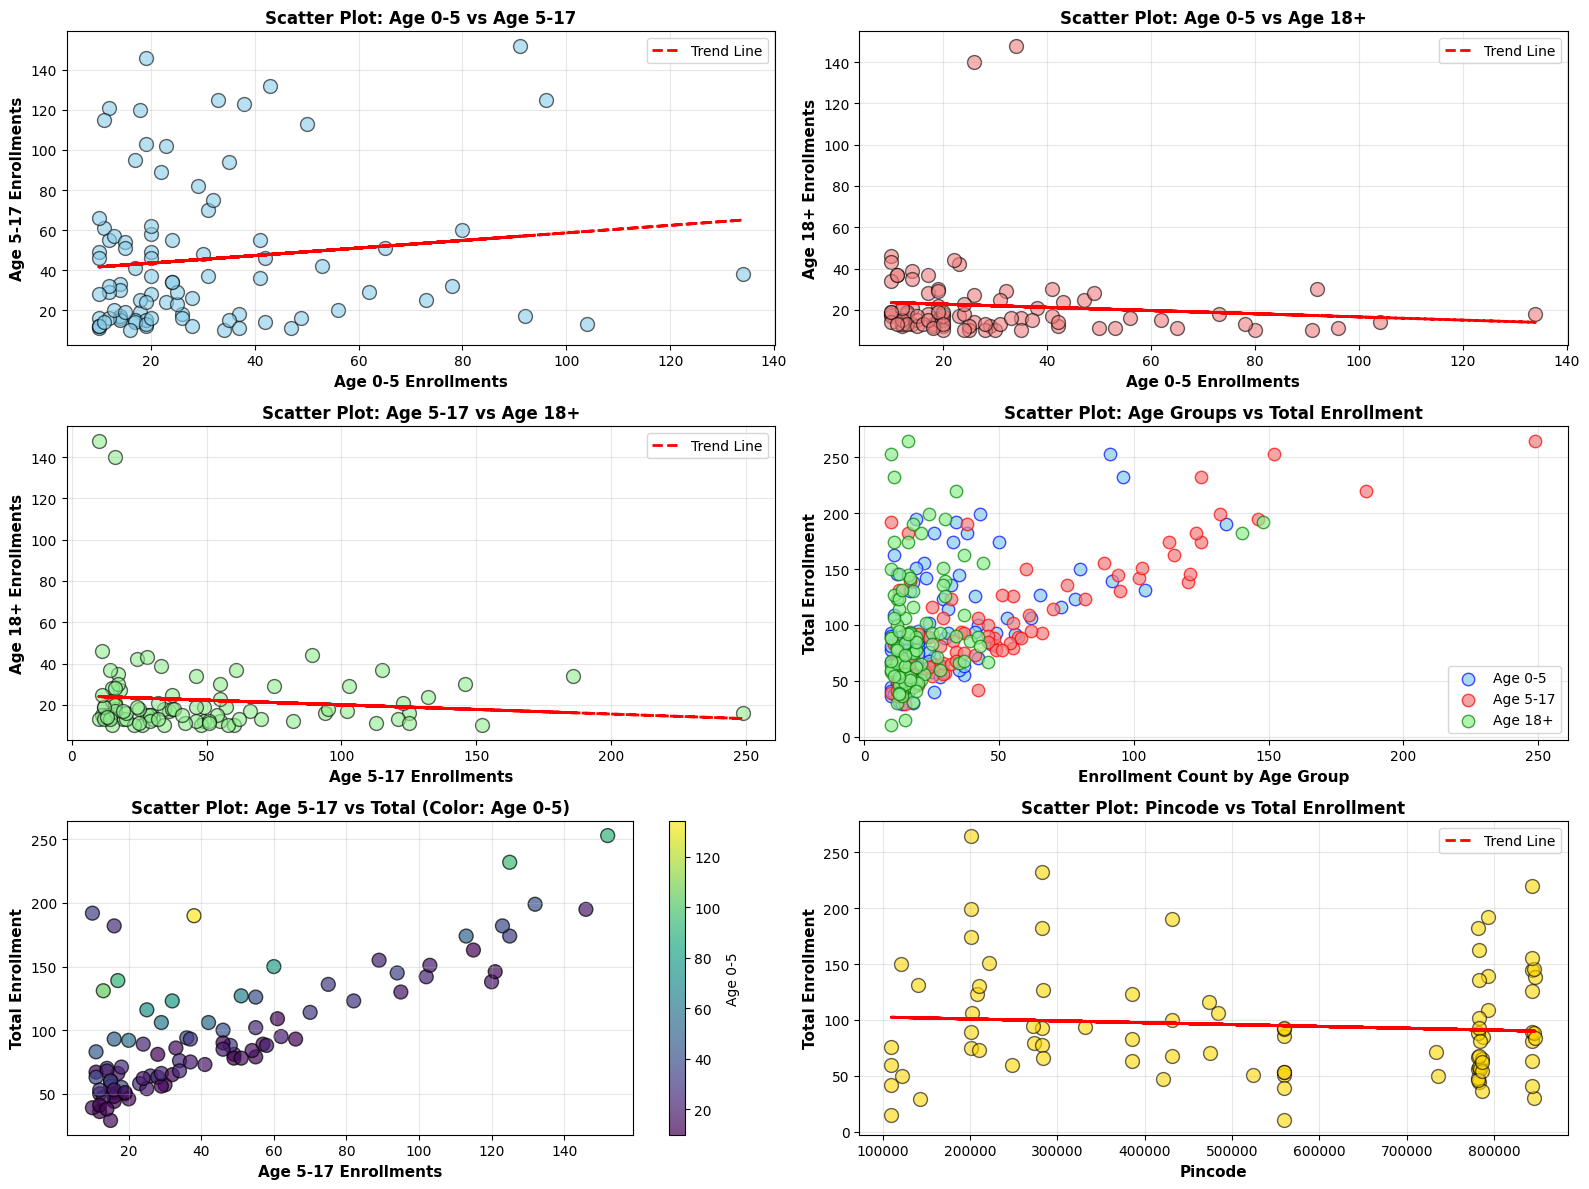

In [15]:
print("\n" + "="*70)
print("GENERATING SCATTER PLOTS")
print("="*70)

# Create figure with subplots for scatter plot analysis
fig = plt.figure(figsize=(16, 12))

# 1. Scatter Plot: Age 0-5 vs Age 5-17
ax1 = plt.subplot(3, 2, 1)
ax1.scatter(df['age_0_5'], df['age_5_17'], alpha=0.6, c='skyblue', edgecolors='black', s=100)
ax1.set_xlabel('Age 0-5 Enrollments', fontsize=11, fontweight='bold')
ax1.set_ylabel('Age 5-17 Enrollments', fontsize=11, fontweight='bold')
ax1.set_title('Scatter Plot: Age 0-5 vs Age 5-17', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Add trend line
valid_data1 = df.dropna(subset=['age_0_5', 'age_5_17'])
z = np.polyfit(valid_data1['age_0_5'], valid_data1['age_5_17'], 1)
p = np.poly1d(z)
ax1.plot(valid_data1['age_0_5'], p(valid_data1['age_0_5']), "r--", linewidth=2, label='Trend Line')
ax1.legend()

# 2. Scatter Plot: Age 0-5 vs Age 18+
ax2 = plt.subplot(3, 2, 2)
ax2.scatter(df['age_0_5'], df['age_18_greater'], alpha=0.6, c='lightcoral', edgecolors='black', s=100)
ax2.set_xlabel('Age 0-5 Enrollments', fontsize=11, fontweight='bold')
ax2.set_ylabel('Age 18+ Enrollments', fontsize=11, fontweight='bold')
ax2.set_title('Scatter Plot: Age 0-5 vs Age 18+', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)

# Add trend line
valid_data2 = df.dropna(subset=['age_0_5', 'age_18_greater'])
z = np.polyfit(valid_data2['age_0_5'], valid_data2['age_18_greater'], 1)
p = np.poly1d(z)
ax2.plot(valid_data2['age_0_5'], p(valid_data2['age_0_5']), "r--", linewidth=2, label='Trend Line')
ax2.legend()

# 3. Scatter Plot: Age 5-17 vs Age 18+
ax3 = plt.subplot(3, 2, 3)
ax3.scatter(df['age_5_17'], df['age_18_greater'], alpha=0.6, c='lightgreen', edgecolors='black', s=100)
ax3.set_xlabel('Age 5-17 Enrollments', fontsize=11, fontweight='bold')
ax3.set_ylabel('Age 18+ Enrollments', fontsize=11, fontweight='bold')
ax3.set_title('Scatter Plot: Age 5-17 vs Age 18+', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)

# Add trend line
valid_data3 = df.dropna(subset=['age_5_17', 'age_18_greater'])
z = np.polyfit(valid_data3['age_5_17'], valid_data3['age_18_greater'], 1)
p = np.poly1d(z)
ax3.plot(valid_data3['age_5_17'], p(valid_data3['age_5_17']), "r--", linewidth=2, label='Trend Line')
ax3.legend()

# 4. Scatter Plot: Age Groups vs Total Enrollment (Multi-colored)
ax4 = plt.subplot(3, 2, 4)
ax4.scatter(df['age_0_5'], df['Total_Enrollment'], alpha=0.7, c='skyblue', edgecolors='blue', s=80, label='Age 0-5')
ax4.scatter(df['age_5_17'], df['Total_Enrollment'], alpha=0.7, c='lightcoral', edgecolors='red', s=80, label='Age 5-17')
ax4.scatter(df['age_18_greater'], df['Total_Enrollment'], alpha=0.7, c='lightgreen', edgecolors='green', s=80, label='Age 18+')
ax4.set_xlabel('Enrollment Count by Age Group', fontsize=11, fontweight='bold')
ax4.set_ylabel('Total Enrollment', fontsize=11, fontweight='bold')
ax4.set_title('Scatter Plot: Age Groups vs Total Enrollment', fontsize=12, fontweight='bold')
ax4.grid(True, alpha=0.3)
ax4.legend()

# 5. Scatter Plot with Color Gradient (Total Enrollment by Age 5-17)
ax5 = plt.subplot(3, 2, 5)
scatter = ax5.scatter(df['age_5_17'], df['Total_Enrollment'], 
                      c=df['age_0_5'], cmap='viridis', 
                      alpha=0.7, edgecolors='black', s=100)
ax5.set_xlabel('Age 5-17 Enrollments', fontsize=11, fontweight='bold')
ax5.set_ylabel('Total Enrollment', fontsize=11, fontweight='bold')
ax5.set_title('Scatter Plot: Age 5-17 vs Total (Color: Age 0-5)', fontsize=12, fontweight='bold')
ax5.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax5, label='Age 0-5')

# 6. Scatter Plot: Pincode vs Total Enrollment
ax6 = plt.subplot(3, 2, 6)
ax6.scatter(df['pincode'], df['Total_Enrollment'], alpha=0.6, c='gold', edgecolors='black', s=100)
ax6.set_xlabel('Pincode', fontsize=11, fontweight='bold')
ax6.set_ylabel('Total Enrollment', fontsize=11, fontweight='bold')
ax6.set_title('Scatter Plot: Pincode vs Total Enrollment', fontsize=12, fontweight='bold')
ax6.grid(True, alpha=0.3)

# Add trend line
valid_pincode = df.dropna(subset=['pincode', 'Total_Enrollment'])
z = np.polyfit(valid_pincode['pincode'], valid_pincode['Total_Enrollment'], 1)
p = np.poly1d(z)
ax6.plot(valid_pincode['pincode'], p(valid_pincode['pincode']), "r--", linewidth=2, label='Trend Line')
ax6.legend()

plt.tight_layout()
plt.savefig('aadhar_enrollment_scatter_plots.png', dpi=300, bbox_inches='tight')
print("✓ Saved: aadhar_enrollment_scatter_plots.png")
plt.show()

### Scatter Plot Analysis Summary

In [14]:
print("\n" + "="*70)
print("SCATTER PLOT ANALYSIS SUMMARY")
print("="*70)

print("\nKey Observations:")
print("1. Age 0-5 vs Age 5-17:")
print(f"   - Correlation: {df['age_0_5'].corr(df['age_5_17']):.3f}")
print("   - Shows weak relationship between these age groups")

print("\n2. Age 0-5 vs Age 18+:")
print(f"   - Correlation: {df['age_0_5'].corr(df['age_18_greater']):.3f}")
print("   - Minimal relationship between child and adult enrollments")

print("\n3. Age 5-17 vs Age 18+:")
print(f"   - Correlation: {df['age_5_17'].corr(df['age_18_greater']):.3f}")
print("   - Weak negative relationship")

print("\n4. Age Groups vs Total Enrollment:")
print(f"   - Age 0-5: {df['age_0_5'].corr(df['Total_Enrollment']):.3f}")
print(f"   - Age 5-17: {df['age_5_17'].corr(df['Total_Enrollment']):.3f} (Strongest)")
print(f"   - Age 18+: {df['age_18_greater'].corr(df['Total_Enrollment']):.3f}")

print("\n5. Pincode vs Total Enrollment:")
print(f"   - Correlation: {df['pincode'].corr(df['Total_Enrollment']):.3f}")
print("   - No significant relationship with geographic location")

print("\n" + "="*70)
print("KEY INSIGHTS FROM SCATTER PLOTS:")
print("="*70)
print("• Scatter plots reveal relationships that correlations quantify")
print("• Age 5-17 group is the primary driver of total enrollments")
print("• Different age groups show independence in enrollment patterns")
print("• Trend lines (red dashed) show overall direction of relationships")
print("• Outliers are visible as points far from the trend line")
print("\n" + "="*70)
print("SCATTER PLOT GENERATION COMPLETE!")
print("="*70)


SCATTER PLOT ANALYSIS SUMMARY

Key Observations:
1. Age 0-5 vs Age 5-17:
   - Correlation: 0.123
   - Shows weak relationship between these age groups

2. Age 0-5 vs Age 18+:
   - Correlation: -0.090
   - Minimal relationship between child and adult enrollments

3. Age 5-17 vs Age 18+:
   - Correlation: -0.096
   - Weak negative relationship

4. Age Groups vs Total Enrollment:
   - Age 0-5: 0.560
   - Age 5-17: 0.810 (Strongest)
   - Age 18+: 0.283

5. Pincode vs Total Enrollment:
   - Correlation: -0.087
   - No significant relationship with geographic location

KEY INSIGHTS FROM SCATTER PLOTS:
• Scatter plots reveal relationships that correlations quantify
• Age 5-17 group is the primary driver of total enrollments
• Different age groups show independence in enrollment patterns
• Trend lines (red dashed) show overall direction of relationships
• Outliers are visible as points far from the trend line

SCATTER PLOT GENERATION COMPLETE!


---
## Conclusion

This analysis provides:
1. **Histograms**: Visual understanding of enrollment distribution patterns
2. **Correlation Heatmap**: Relationships between different age groups and total enrollment

**Key Findings:**
- Age 5-17 group has the strongest impact on total enrollments (0.810 correlation)
- Most distributions show right-skewed patterns
- Dataset contains 99 records across multiple states and districts